Execution for house price estimation

In [1]:
# Import relevant files and libraries
import DataProcessor
import sys
import LRegression
import NLRegression
import performance_metrics
import kmeans
import UserInterface

Define the parameters



In [2]:
# Allocate 80% of data to training
train_size = 0.8

# Identify features to be used
columnsToKeep = ['Price','Type','Bedroom','Bathroom','Car','Landsize','BuildingArea','Latitude','Longitude']
#columnsToKeep = ['Price', 'Bedroom', 'Bathroom']
#columnsToKeep = ['Price', 'Type', 'Landsize', 'BuildingArea']

# Path to dataset.
filepath = '../dataset/Melbourne_housing_FULL.csv'

# Identify prediction (ground truth)
prediction_column = 'Price'

Process raw data

In [3]:
# Create a DataProcessor object and load the data
dp_obj = DataProcessor.DataProcessor()
dp_obj.LoadData(filepath)

# Remove incomplete points, remove unused features and shuffle the data
dp_obj.keepSelectedColumns(columnsToKeep)
dp_obj.filterData()
# dp_obj.encodeCategoricalData(['Type'])
dp_obj.shuffleData()
dp_obj.reduceDataSize(1000)

# Split the data into training and testing
train_X, train_Y, test_X, test_Y = dp_obj.splitData(train_size, prediction_column)

# print(train_X.head())

# Remove dwelling type and additional landsize / building area data for some processing
clean_columns = ['Type', 'Landsize','BuildingArea']
train_X_clean = train_X.drop(columns=clean_columns,axis=1)
test_X_clean = test_X.drop(columns=clean_columns,axis=1)

Data Processor object created
training size 800
test size 200


K-Means Clustering

In [ ]:
# Ashton
k = 5
pref = 'Size'
kmeans = Kmeans.Kmeans(train_X, train_Y, k, pref)

train_X, points, centroids = kmeans.cluster()

#plotKmean(train_X, points, centroids) 

Linear Regression

In [ ]:
# TEMPORARY
k = 5
pref = 'Size'
km = kmeans.Kmeans(train_X_clean,train_Y,k,pref)

train_X, points, centroids = km.cluster()
print(train_X['Assignment'].shape)

In [ ]:
lr = LRegression.LRegression()
for i in range(k):
    features = train_X[train_X['Assignment'] == i]
    features = features.drop('Assignment',axis=1)
    targets = train_Y[train_X['Assignment'] == i]
    y_pred = lr.LinearRegression(features=features,target=targets)
    print(y_pred)

In [ ]:
lr = LRegression.LRegression()
assignments = train_X['Assignment']
# features = train_X.drop('Assignment',axis=1)
features = train_X
models = lr.LinearReg(assignments,features,train_Y)

In [ ]:
# Train
lr = LRegression.LRegression()
y_pred = []
# for i in range(k):
#     y_pred.append(lr.LinReg(features=train_X,target=train_Y,assignment=i))
y_pred = lr.LinReg(features=train_X,target=train_Y,assignment=train_X['Assignment'])

In [ ]:
# Test


Non-Linear Regression (Gaussian Processing)

In [4]:
# Train

# options: 'Type','Bedroom','Bathroom','Car','Size','Latitude','Longitude'
featuresToTrain = ['Latitude','Longitude']

nlr = NLRegression.NLRegression(train_X, train_Y, test_X, test_Y, featuresToTrain)
nlr.train()

/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


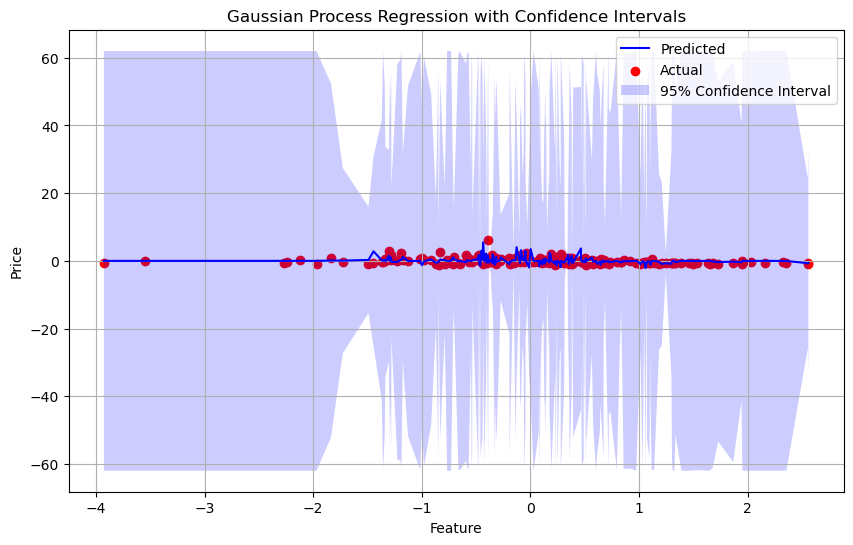

In [5]:
# plotting predictions vs expected
nlr.plot()

In [6]:
# Test
nlr.cross_validate()

/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Cross-Validation Scores (R²): [ 0.00571391  0.00508886 -1.0803622 ]
Mean R²: -0.3565198062963082, Standard Deviation: 0.5118339259698904


/opt/miniconda3/envs/ai/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Evaluation Metrics

In [ ]:
# Wajeeha

User input for preference

In [ ]:
# Calculate mean values if no user preference is provided
meanLand = dp_obj.getAverage('Landsize')
meanBuilding = dp_obj.getAverage('BuildingArea')

# Input user preferences
user_pref = UserInterface.UserInterface()
type, bedrooms, bathrooms, car, size, latitude, longitude = user_pref.Inputs(meanLand, meanBuilding)
print(type,bedrooms,bathrooms,car,size,latitude,longitude)

Final prediction

In [ ]:
# Return predicted value from best performing model
targets = [type,bedrooms,bathrooms,car,size,latitude,longitude]
pred = lr.predict(features=targets)